    w_x  w_y  w_z
0    -6   87   28
1  -252  113   31
2   240   65   34
3     4   99   72
4   -79   67   46
5    41   61   46
6   -68   71   35
7   -23   80   33
8   -27   74   36
9   -63   72   41
10  -41   70   39
11  -11   61   60
12  -59   61   35
13  -25   78   52
14  -47   74   27
15  -44   71   17
16  -26   67   53
17  -37   66   33
18  -49   77   57
19  114   35   29
20   21   69   52
21  243   68   51
22  -19   69   36
23  -24   72   45
24  254   73   36
25  -23   56   41
26   -3   52   37
27  -67   71   54
28  -72   62   38
29  -51   74   43
30 -249   64   53
31  -28   58   59
32    2   57   42
33   69   80   35
34  -10   65   35
35  -30   68   44
36  -33   71   38
37  -48   54   16
38 -248   71   31
39  -36   70   45
40  -29   74   48
41   61   49   38
42  -22   57   52
43  -42   90   44
44  -18   74   71
45  -20   40   33
46  -14   55   36
47  -18   56   56
48  -84   71   42
49 -252   58   45
--------------------------------------------------
Gyro Calibrating - Keep the IMU

C:\Users\nicol\AppData\Local\Temp\ipykernel_3368\3117217197.py:109: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


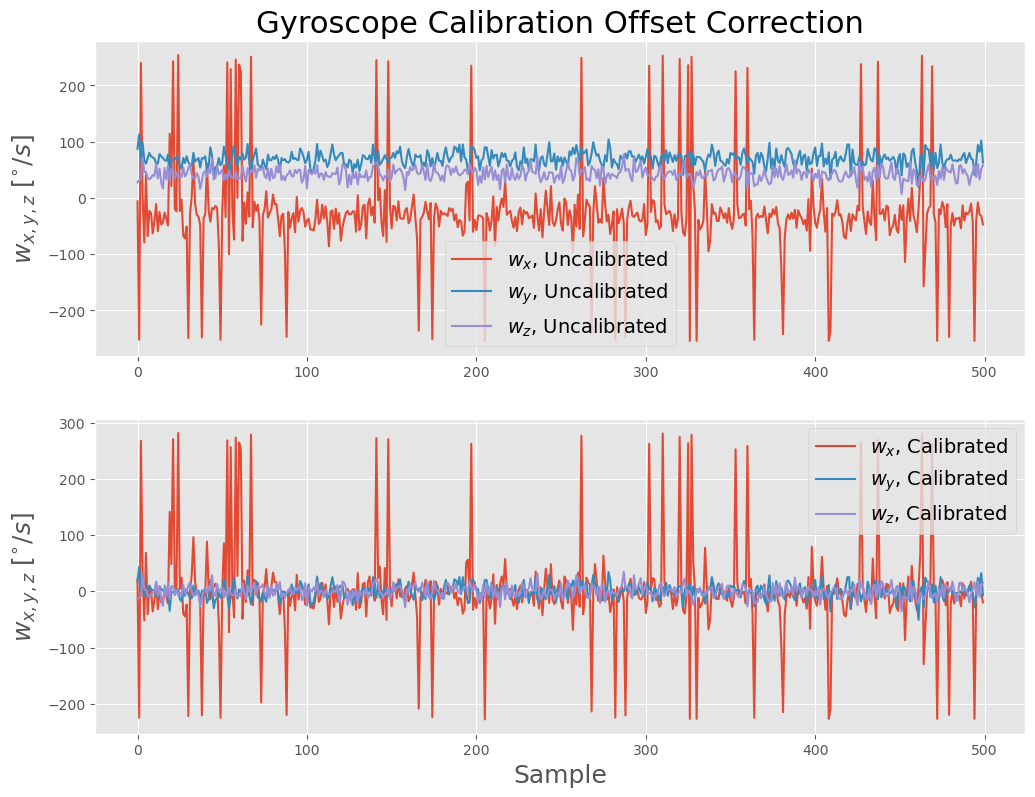

In [1]:
######################################################
# Copyright (c) 2021 Maker Portal LLC
# Author: Joshua Hrisko
######################################################
#
# This code reads data from the MPU9250/MPU9265 board
# (MPU6050 - accel/gyro, AK8963 - mag)
# and solves for calibration coefficients for the
# gyroscope
#
#
######################################################
#
# This code has been altered by Nicole DuPlessis 
# to take in gyroscope data from a csv file 
import time
t0 = time.time()
start_bool = True # if IMU start fails - stop calibration
import numpy as np
import csv,datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
cols = ['w_x','w_y','w_z', 'nAn']
gyro_df = pd.read_csv('gyroData.csv', sep=',', names=cols)
mpu_array = []
time.sleep(2) # wait for MPU to load and settle
# 
#####################################
# Gyro calibration (Steady)
#####################################
#

def get_gyro():
    _,_,_,wx,wy,wz = mpu6050_conv() # read and convert gyro data
    return wx,wy,wz

def gyro_cal():
    print("-"*50)
    print('Gyro Calibrating - Keep the IMU Steady')
    #[get_gyro() for ii in range(0,cal_size)] # clear buffer before calibration
    #mpu_array = []
    gyro_offsets = [0.0,0.0,0.0]
    for i in range(500):
        try:
            wx,wy,wz = gyro_df['w_x'][i], gyro_df['w_y'][i], gyro_df['w_z'][i]  # get gyro vals
        except:
            continue

        mpu_array.append([wx,wy,wz])

        if np.shape(mpu_array)[0]==cal_size:
            for qq in range(0,3):
                gyro_offsets[qq] = np.mean(np.array(mpu_array)[:,qq]) # average
            break
    print('Gyro Calibration Complete')
    print("mpu array", mpu_array)
    return gyro_offsets

if __name__ == '__main__':
    if not start_bool:
        print("IMU not Started - Check Wiring and I2C")
    else:
        #
        ###################################
        # Gyroscope Offset Calculation
        ###################################
        #
        gyro_labels = ['w_x','w_y','w_z'] # gyro labels for plots
        gyro_df = gyro_df.drop('nAn', axis=1)
        print(gyro_df[:50])
        cal_size = 500 # points to use for calibration
        gyro_offsets = gyro_cal() # calculate gyro offsets
        print("offsets", gyro_offsets)
        #
        ###################################
        # Record new data 
        ###################################
        #
        data = gyro_df.to_numpy()
        #data = mpu_array
        print(data[:50])
        #
        ###################################
        # Plot with and without offsets
        ###################################
        #
        plt.style.use('ggplot')
        fig,axs = plt.subplots(2,1,figsize=(12,9))
        for ii in range(0,3):
            axs[0].plot(data[:,ii],
                        label='${}$, Uncalibrated'.format(gyro_labels[ii]))
            axs[1].plot(data[:,ii]-gyro_offsets[ii],
                        label='${}$, Calibrated'.format(gyro_labels[ii]))
        axs[0].legend(fontsize=14);axs[1].legend(fontsize=14)
        axs[0].set_ylabel('$w_{x,y,z}$ [$^{\circ}/s$]',fontsize=18)
        axs[1].set_ylabel('$w_{x,y,z}$ [$^{\circ}/s$]',fontsize=18)
        axs[1].set_xlabel('Sample',fontsize=18)
        #axs[0].set_ylim([-2,2]);axs[1].set_ylim([-2,2])
        axs[0].set_title('Gyroscope Calibration Offset Correction',fontsize=22)
        fig.savefig('gyro_calibration_output.png',dpi=300,
                    bbox_inches='tight',facecolor='#FCFCFC')
        fig.show()